In [2]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from cur import cur_decomposition

In [3]:
# Get the current working directory
cwd = os.getcwd()

# Define file paths with cwd appended
file_path_2b = os.path.join(cwd, "../dft_pds/2b_all_pd")
file_path_3b = os.path.join(cwd, "../dft_pds/3b_all_pd")
file_path_4b = os.path.join(cwd, "../dft_pds/4b_all_pd")
file_path_labels = os.path.join(cwd, "../dft_pds/labels_pd")
file_path_natoms = os.path.join(cwd, "../test_notebooks/energies_per_atom.txt")

# Open pickle files with the updated file paths
with open(file_path_2b, 'rb') as pickle_file:
    pd_2b = pickle.load(pickle_file)

with open(file_path_3b, 'rb') as pickle_file:
    pd_3b = pickle.load(pickle_file)

with open(file_path_4b, 'rb') as pickle_file:
    pd_4b = pickle.load(pickle_file)

with open(file_path_labels, 'rb') as pickle_file:
    labels = pickle.load(pickle_file)

natom_list = []

# Open the text file for reading
with open(file_path_natoms, 'r') as file:

    # Read the contents of the file
    lines = file.readlines()[1:]

    # Iterate through each line
    for line in lines:

        # Split the line into words
        words = line.split()
        natoms = line.split("|")[1].strip()

        # Extract the last word, assuming it's a number
        last_number = float(words[-1])
        if words[0][-1] == 'z':
            print(words[0])
            continue
        natom_list.append(natoms)

natom_list = np.array(natom_list[:-10])

# Combine the arrays along the second axis (axis=1)
all_array = np.concatenate((pd_2b, pd_3b, pd_4b), axis=2)
all_array = all_array.reshape(-1, all_array.shape[2])
print(np.shape(all_array))
df_fingerprints = pd.DataFrame(all_array)

# Define the column labels for each set of columns
column_labels_2b = [f'2B_{i}' for i in range(60)]
column_labels_3b = [f'3B_{i}' for i in range(60)]
column_labels_4b = [f'4B_{i}' for i in range(60)]

# Assign the column labels to the DataFrame
column_labels = column_labels_2b + column_labels_3b + column_labels_4b
df_fingerprints.columns = column_labels
df_fingerprints = df_fingerprints.fillna(0)

df_fingerprints.head()
df_fingerprints.to_csv('out.csv')
M = df_fingerprints.to_numpy()

training_data_#0000.xyz
training_data_#0050.xyz
training_data_#0055.xyz
training_data_#0060.xyz
training_data_#0075.xyz
training_data_#0080.xyz
training_data_#0110.xyz
(300, 180)


In [8]:
# https://github.com/gentaiscool/matrix_fact/blob/main/matrix_fact/cur.py

from matrix_fact.cur import CUR

cur_mdl = CUR(M, rrank=30, crank=180)  
cur_mdl.factorize()

In [9]:
np.shape(cur_mdl.V)
# Calculate the two-norm of each row
norms = np.linalg.norm(cur_mdl.V, axis=1)

print(norms.shape)

(30,)


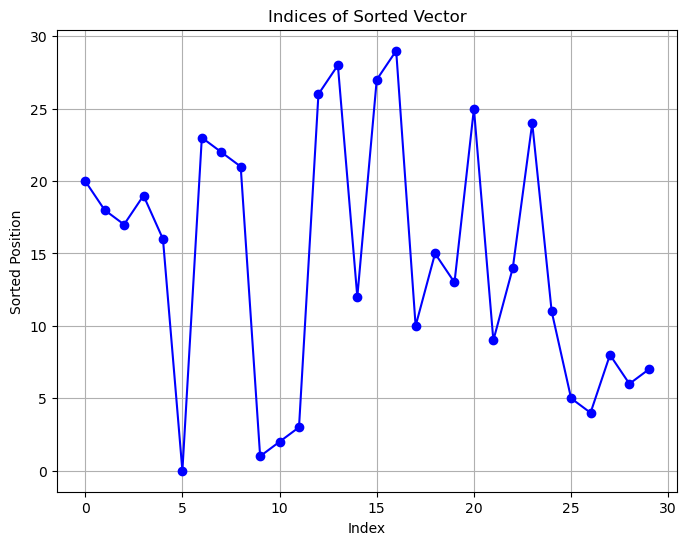

In [10]:
# Get the indices of the sorted vector from highest to lowest
sorted_indices = np.argsort(norms)[::-1]

# Plot the indices
plt.figure(figsize=(8, 6))
plt.plot(range(len(sorted_indices)), sorted_indices,marker='o', linestyle='-', color='b')
plt.xlabel('Index')
plt.ylabel('Sorted Position')
plt.title('Indices of Sorted Vector')
plt.grid(True)
plt.show()